# Model 5 - Fault

A simple fault model with constant offset. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

../..\gempy\posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")


Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/examples/input_data/model5_orientations.csv",
                        path_i = os.pardir+"/examples/input_data/model5_surface_points.csv") 

../..\gempy\data_management.py:1267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  values = np.vstack(map(np.ravel, g)).T.astype("float32")


In [3]:
geo_data.get_data()

X      Y      Z formation          series  \
interfaces   19   450.0  200.0  600.0     fault  Default series   
             21   450.0  800.0  600.0     fault  Default series   
             20   500.0  800.0  500.0     fault  Default series   
             16   500.0  500.0  500.0     fault  Default series   
             17   450.0  500.0  600.0     fault  Default series   
             18   500.0  200.0  500.0     fault  Default series   
             1      0.0  800.0  600.0     rock1  Default series   
             2    200.0  200.0  600.0     rock1  Default series   
             3    200.0  800.0  600.0     rock1  Default series   
             5    800.0  800.0  200.0     rock1  Default series   
             6   1000.0  200.0  200.0     rock1  Default series   
             7   1000.0  800.0  200.0     rock1  Default series   
             0      0.0  200.0  600.0     rock1  Default series   
             4    800.0  200.0  200.0     rock1  Default series   
             9      0.0  800.0  800.0     rock2  Default series   
             10   200.0  200.0  800.0     rock2  Default series   
             11   200.0  800.0  800.0     rock2  Default series   
             12   800.0  200.0  400.0     rock2  Default series   
             13   800.0  800.0  400.0     rock2  Default series   
             14  1000.0  200.0  400.0     rock2  Default series   
             15  1000.0  800.0  400.0     rock2  Default series   
             8      0.0  200.0  800.0     rock2  Default series   
             22     0.0    0.0    0.0  basement  Default series   
orientations 4    500.0  500.0  500.0     fault  Default series   
             1    100.0  500.0  600.0     rock1  Default series   
             3    900.0  500.0  200.0     rock1  Default series   
             0    100.0  500.0  800.0     rock2  Default series   
             2    900.0  500.0  400.0     rock2  Default series   

                 formation_number  order_series  isFault           G_x  \
interfaces   19                 1             1    False           NaN   
             21                 1             1    False           NaN   
             20                 1             1    False           NaN   
             16                 1             1    False           NaN   
             17                 1             1    False           NaN   
             18                 1             1    False           NaN   
             1                  2             1    False           NaN   
             2                  2             1    False           NaN   
             3                  2             1    False           NaN   
             5                  2             1    False           NaN   
             6                  2             1    False           NaN   
             7                  2             1    False           NaN   
             0                  2             1    False           NaN   
             4                  2             1    False           NaN   
             9                  3             1    False           NaN   
             10                 3             1    False           NaN   
             11                 3             1    False           NaN   
             12                 3             1    False           NaN   
             13                 3             1    False           NaN   
             14                 3             1    False           NaN   
             15                 3             1    False           NaN   
             8                  3             1    False           NaN   
             22                 4             1    False           NaN   
orientations 4                  1             1    False  8.660254e-01   
             1                  2             1    False  1.000000e-12   
             3                  2             1    False  1.000000e-12   
             0                  3             1    False  1.000000e-12   
      

Setting and ordering the units and series:

In [5]:
gp.set_series(geo_data, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['fault', 
                                         'rock2','rock1'
                                         ], verbose=0) 

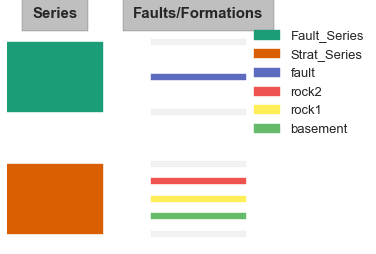

In [6]:
#%matplotlib inline
gp.get_sequential_pile(geo_data)

In [7]:
%matplotlib inline
#gp.plotting.plot_data(geo_data, direction='y')

Calculating the model:

In [8]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [9]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Displaying the result in x and y direction:

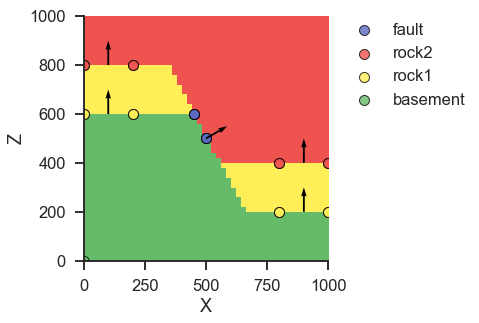

In [11]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                         direction='y', plot_data=True)

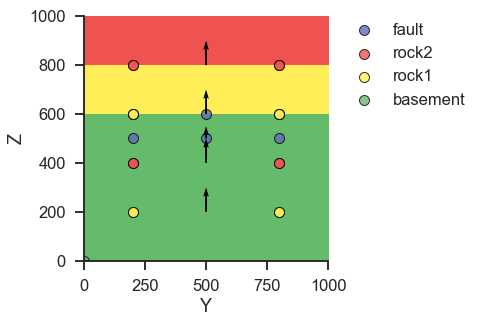

In [14]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=15,
                         direction='x', plot_data=True)